# Housing price predictive model

In [7]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries for handling data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill

In [3]:
#Import data
url= 'Cook_County_Assessor_s_Residential_Modeling_Characteristics__Chicago_.csv'

df = pd.read_csv(url)

C:\Users\Yerlan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,21,23,24,25,28,29,30,31,33,36,37,38,39,40,41,43,44,45,46,47,48,49,66,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Storing data
with open('df.pkl', 'wb') as file:
    dill.dump(df, file)

In [5]:
#Read data
with open('df.pkl', 'rb') as file:
    df = dill.load(file)

# Data Wrangling

In [6]:
df.shape

(678656, 80)

In [7]:
# Get a summary of all features in the data and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678656 entries, 0 to 678655
Data columns (total 80 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Property Index Number                      678656 non-null  object 
 1   Assessment Triad                           678656 non-null  object 
 2   Property Class                             678656 non-null  int64  
 3   Property Address                           438038 non-null  object 
 4   Property Apartment Num.                    53875 non-null   object 
 5   Property City                              438038 non-null  object 
 6   Township Name                              678656 non-null  object 
 7   Township Code                              678656 non-null  int64  
 8   Neighborhood Code                          678656 non-null  int64  
 9   Township Neighborhood Only                 678656 non-null  int64  
 10  Modeling

In [8]:
df = df[df['Sale Price'].notna()]

In [12]:
#Dropping unnecessary columns
df = df.drop(df.columns[66:], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78156 entries, 8 to 678636
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property Index Number              78156 non-null  object 
 1   Assessment Triad                   78156 non-null  object 
 2   Property Class                     78156 non-null  int64  
 3   Property Address                   45550 non-null  object 
 4   Property Apartment Num.            5984 non-null   object 
 5   Property City                      45550 non-null  object 
 6   Township Name                      78156 non-null  object 
 7   Township Code                      78156 non-null  int64  
 8   Neighborhood Code                  78156 non-null  int64  
 9   Township Neighborhood Only         78156 non-null  int64  
 10  Modeling Group                     78156 non-null  object 
 11  Proportion Assessed                78156 non-null  fl

In [14]:
with open('data.pkl', 'wb') as file:
    dill.dump(df, file)

In [15]:
with open('data.pkl', 'rb') as file:
    data = dill.load(file)

In [16]:
print(data.shape)

(78156, 66)


Here, I am checking % of NaN values present in each feature

In [17]:
feautres_na = [features for features in data.columns if data[features].isnull().sum()>1]

In [18]:
feautres_na

['Property Address',
 'Property Apartment Num.',
 'Property City',
 'Key PIN',
 'Multi Code',
 'Number of Active 288s (HIEs)',
 'Number of Ended 288s (HIEs)',
 'Land Square Feet',
 'Large Home Indicator',
 'Apartments',
 'Wall Material',
 'Roof Material',
 'Rooms',
 'Bedrooms',
 'Basement',
 'Basement Finish',
 'Central Heating',
 'Central Air Conditioning',
 'Fireplaces',
 'Attic Type',
 'Full Baths',
 'Half Baths',
 'Design Plan',
 'Cathedral Ceiling',
 'Garage 1 Size',
 'Garage 1 Material',
 'Garage 1 Attached',
 'Garage 1 Area',
 'Building Square Feet',
 'Repair Condition',
 'Use',
 'Type of Residence',
 'Attic Finish',
 'Renovation',
 'Porch',
 'Property Zip Code',
 'Municipality FIPS Code',
 'Municipality Name']

In [19]:
for features in feautres_na:
    print(features,np.round(data[features].isnull().mean(),4),'%')

Property Address 0.4172 %
Property Apartment Num. 0.9234 %
Property City 0.4172 %
Key PIN 0.5822 %
Multi Code 0.0003 %
Number of Active 288s (HIEs) 0.4168 %
Number of Ended 288s (HIEs) 0.4168 %
Land Square Feet 0.4168 %
Large Home Indicator 0.4168 %
Apartments 0.8385 %
Wall Material 0.4169 %
Roof Material 0.4169 %
Rooms 0.4168 %
Bedrooms 0.4168 %
Basement 0.4169 %
Basement Finish 0.4169 %
Central Heating 0.4169 %
Central Air Conditioning 0.4169 %
Fireplaces 0.4169 %
Attic Type 0.4169 %
Full Baths 0.4168 %
Half Baths 0.4168 %
Design Plan 0.5749 %
Cathedral Ceiling 0.6938 %
Garage 1 Size 0.4169 %
Garage 1 Material 0.5592 %
Garage 1 Attached 0.5592 %
Garage 1 Area 0.5592 %
Building Square Feet 0.4168 %
Repair Condition 0.4169 %
Use 0.4169 %
Type of Residence 0.4169 %
Attic Finish 0.7888 %
Renovation 0.996 %
Porch 0.8486 %
Property Zip Code 0.4172 %
Municipality FIPS Code 0.0007 %
Municipality Name 0.0007 %


After consideration, I decided to drop columns with more that 45% missing values

In [20]:
more_than_45_percent_misssing_value_features = [features for features in feautres_na if (np.round(data[features].isnull().mean(),4)) > 0.45]

In [21]:
more_than_45_percent_misssing_value_features

['Property Apartment Num.',
 'Key PIN',
 'Apartments',
 'Design Plan',
 'Cathedral Ceiling',
 'Garage 1 Material',
 'Garage 1 Attached',
 'Garage 1 Area',
 'Attic Finish',
 'Renovation',
 'Porch']

In [22]:
print("Rows     : ", data.shape[0])
print("Columns  : ", data.shape[1])
print("\nFeatures : \n", data.columns.tolist())
print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n", data.nunique())

Rows     :  78156
Columns  :  66

Features : 
 ['Property Index Number', 'Assessment Triad', 'Property Class', 'Property Address', 'Property Apartment Num.', 'Property City', 'Township Name', 'Township Code', 'Neighborhood Code', 'Township Neighborhood Only', 'Modeling Group', 'Proportion Assessed', 'Key PIN', 'Multi Code Indicator', 'Multi Code', 'Number of Active 288s (HIEs)', 'Number of Ended 288s (HIEs)', 'Sale Date', 'Sale Price', 'Sale Document Number', 'Land Square Feet', 'Large Home Indicator', 'Age', 'Apartments', 'Wall Material', 'Roof Material', 'Rooms', 'Bedrooms', 'Basement', 'Basement Finish', 'Central Heating', 'Central Air Conditioning', 'Fireplaces', 'Attic Type', 'Full Baths', 'Half Baths', 'Design Plan', 'Cathedral Ceiling', 'Garage 1 Size', 'Garage 1 Material', 'Garage 1 Attached', 'Garage 1 Area', 'Building Square Feet', 'Repair Condition', 'Use', 'Type of Residence', 'Attic Finish', 'Renovation', 'Porch', 'Property Zip Code', 'Tract GEOID', 'Municipality FIPS Code

In [23]:
# Get a summary of all features in the data and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78156 entries, 8 to 678636
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property Index Number              78156 non-null  object 
 1   Assessment Triad                   78156 non-null  object 
 2   Property Class                     78156 non-null  int64  
 3   Property Address                   45550 non-null  object 
 4   Property Apartment Num.            5984 non-null   object 
 5   Property City                      45550 non-null  object 
 6   Township Name                      78156 non-null  object 
 7   Township Code                      78156 non-null  int64  
 8   Neighborhood Code                  78156 non-null  int64  
 9   Township Neighborhood Only         78156 non-null  int64  
 10  Modeling Group                     78156 non-null  object 
 11  Proportion Assessed                78156 non-null  fl

In [24]:
# Remove duplicates from data, if any
data.duplicated(subset=None, keep="first")
print("Housing Data", data.shape)

Housing Data (78156, 66)


In [25]:
# next I'll check for missing values in data
pd.options.display.min_rows = 100
data.isnull().sum().sort_values(ascending=False)

Renovation                           77843
Property Apartment Num.              72172
Porch                                66324
Apartments                           65531
Attic Finish                         61650
Cathedral Ceiling                    54228
Key PIN                              45500
Design Plan                          44928
Garage 1 Area                        43704
Garage 1 Attached                    43704
Garage 1 Material                    43703
Property Zip Code                    32606
Property City                        32606
Property Address                     32606
Repair Condition                     32585
Type of Residence                    32585
Central Air Conditioning             32585
Central Heating                      32585
Basement Finish                      32585
Basement                             32585
Wall Material                        32585
Attic Type                           32585
Roof Material                        32585
Use        

In [26]:
feautres_na = [features for features in data.columns if data[features].isnull().sum()>1]
len(feautres_na)

38

In [27]:
feautres_na

['Property Address',
 'Property Apartment Num.',
 'Property City',
 'Key PIN',
 'Multi Code',
 'Number of Active 288s (HIEs)',
 'Number of Ended 288s (HIEs)',
 'Land Square Feet',
 'Large Home Indicator',
 'Apartments',
 'Wall Material',
 'Roof Material',
 'Rooms',
 'Bedrooms',
 'Basement',
 'Basement Finish',
 'Central Heating',
 'Central Air Conditioning',
 'Fireplaces',
 'Attic Type',
 'Full Baths',
 'Half Baths',
 'Design Plan',
 'Cathedral Ceiling',
 'Garage 1 Size',
 'Garage 1 Material',
 'Garage 1 Attached',
 'Garage 1 Area',
 'Building Square Feet',
 'Repair Condition',
 'Use',
 'Type of Residence',
 'Attic Finish',
 'Renovation',
 'Porch',
 'Property Zip Code',
 'Municipality FIPS Code',
 'Municipality Name']

In [28]:
data[feautres_na]

Property Address Property Apartment Num. Property City  \
8                   NaN                     NaN           NaN   
33                  NaN                     NaN           NaN   
42                  NaN                     NaN           NaN   
43                  NaN                     NaN           NaN   
52                  NaN                     NaN           NaN   
68                  NaN                     NaN           NaN   
77                  NaN                     NaN           NaN   
97                  NaN                     NaN           NaN   
103                 NaN                     NaN           NaN   
106                 NaN                     NaN           NaN   
109                 NaN                     NaN           NaN   
118                 NaN                     NaN           NaN   
139                 NaN                     NaN           NaN   
144                 NaN                     NaN           NaN   
158                 NaN                     NaN           NaN   
162                 NaN                     NaN           NaN   
165                 NaN                     NaN           NaN   
176                 NaN                     NaN           NaN   
177                 NaN                     NaN           NaN   
184                 NaN                     NaN           NaN   
194                 NaN                     NaN           NaN   
202                 NaN                     NaN           NaN   
222                 NaN                     NaN           NaN   
229                 NaN                     NaN           NaN   
239                 NaN                     NaN           NaN   
243                 NaN                     NaN           NaN   
258                 NaN                     NaN           NaN   
273                 NaN                     NaN           NaN   
286                 NaN                     NaN           NaN   
289                 NaN                     NaN           NaN   
...                 ...                     ...           ...   
678429              NaN                     NaN           NaN   
678434              NaN                     NaN           NaN   
678437              NaN                     NaN           NaN   
678439              NaN                     NaN           NaN   
678455              NaN                     NaN           NaN   
678467              NaN                     NaN           NaN   
678472              NaN                     NaN           NaN   
678476              NaN                     NaN           NaN   
678481              NaN                     NaN           NaN   
678484              NaN                     NaN           NaN   
678496              NaN                     NaN           NaN   
678498              NaN                     NaN           NaN   
678503              NaN                     NaN           NaN   
678506              NaN                     NaN           NaN   
678518              NaN                     NaN           NaN   
678532              NaN                     NaN           NaN   
678540              NaN                     NaN           NaN   
678547              NaN                     NaN           NaN   
678553              NaN                     NaN           NaN   
678555              NaN                     NaN           NaN   
678567              NaN                     NaN           NaN   
678577              NaN                     NaN           NaN   
678578              NaN                     NaN           NaN   
678586              NaN                     NaN           NaN   
678610              NaN                     NaN           NaN   
678615              NaN                     NaN           NaN   
678617              NaN                     NaN           NaN   
678620              NaN                     NaN           NaN   
678622              NaN                     NaN           NaN   
678636              NaN                   

# Data visualization 

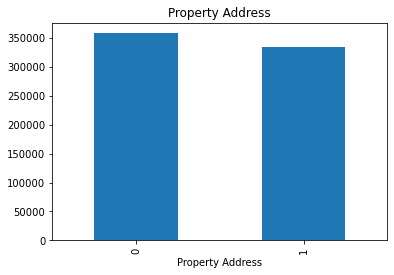

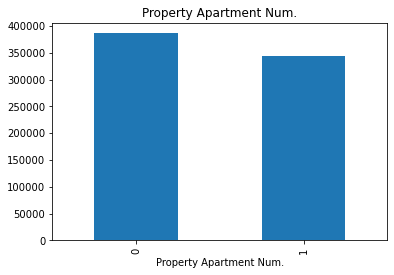

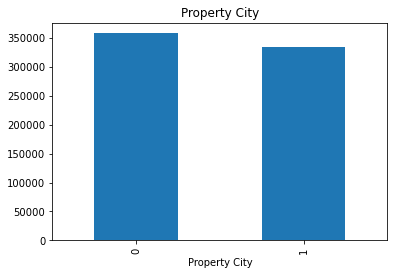

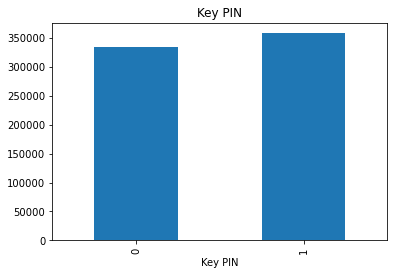

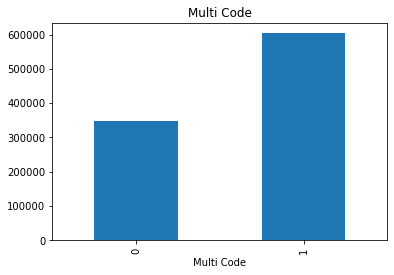

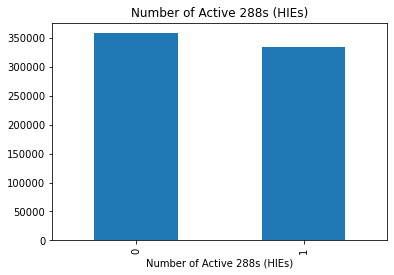

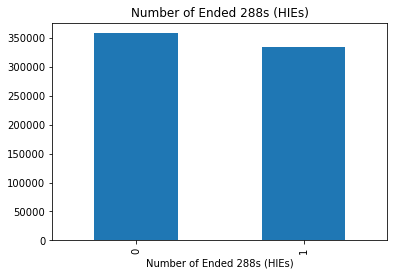

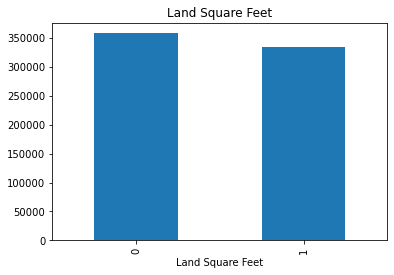

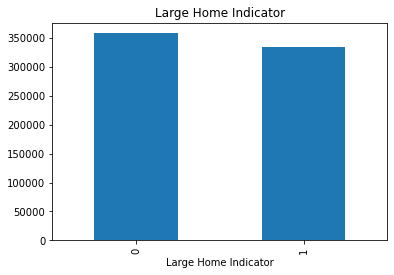

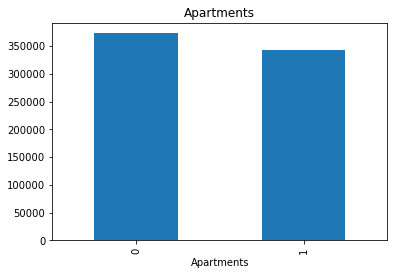

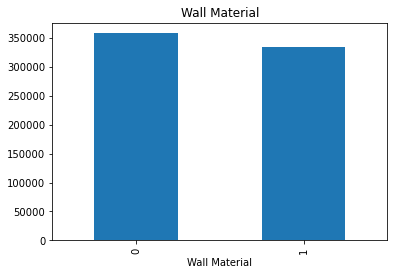

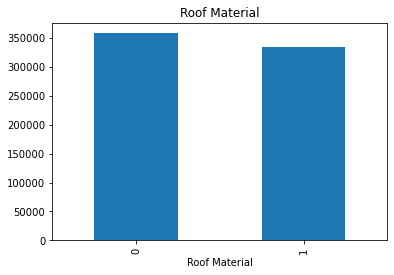

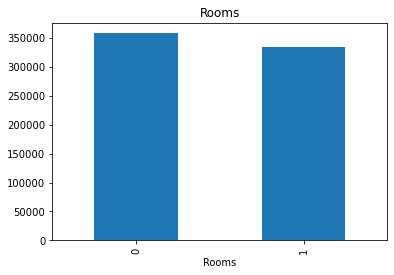

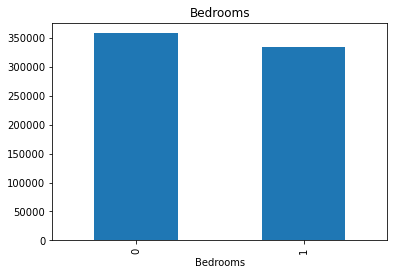

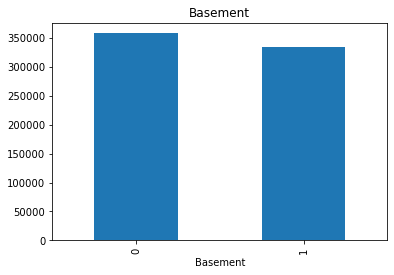

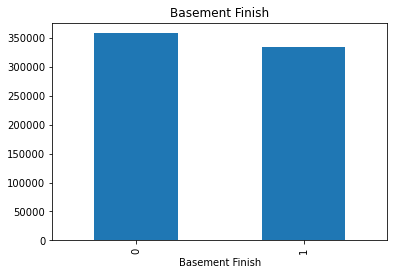

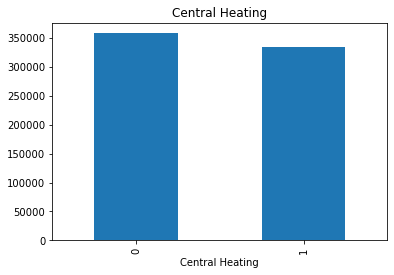

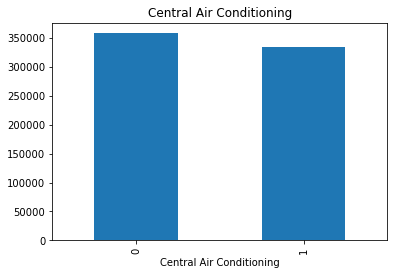

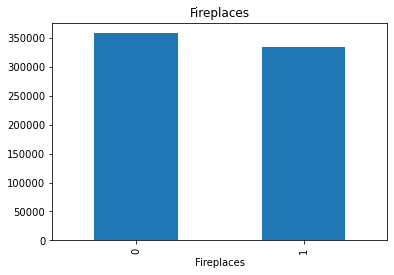

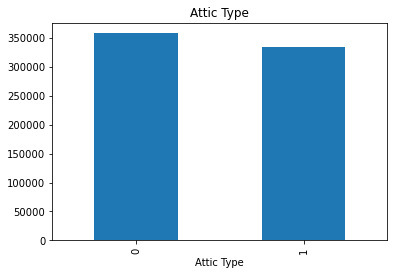

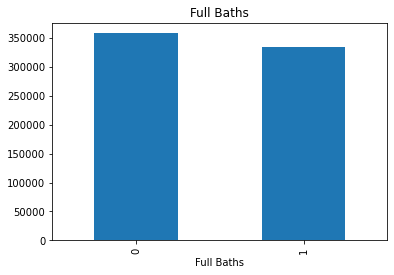

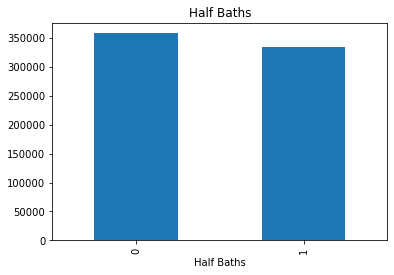

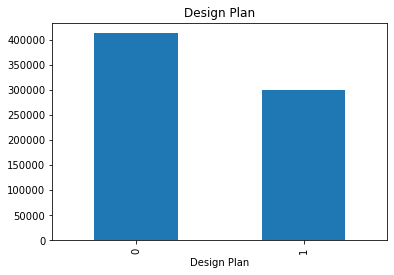

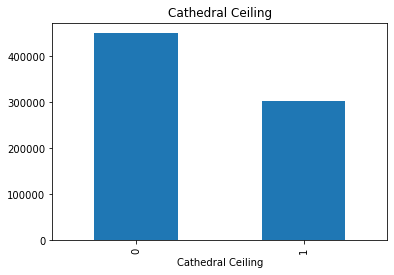

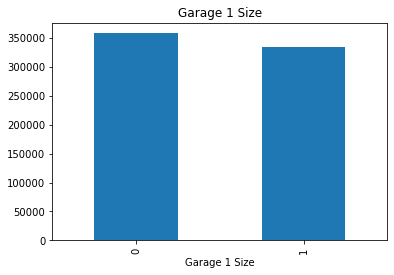

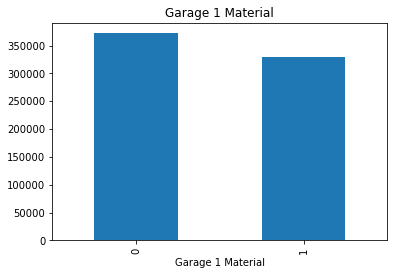

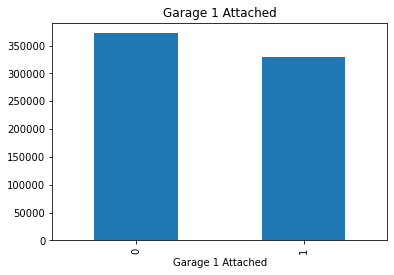

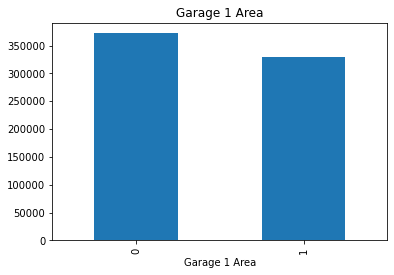

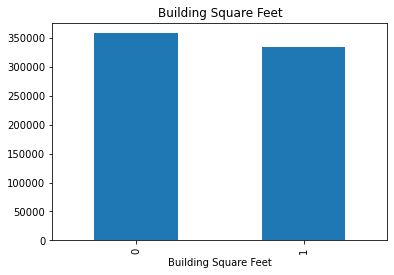

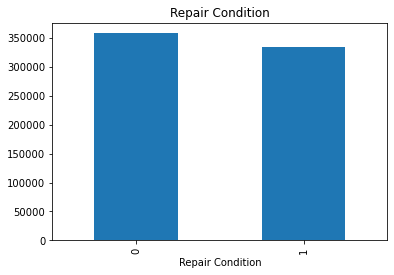

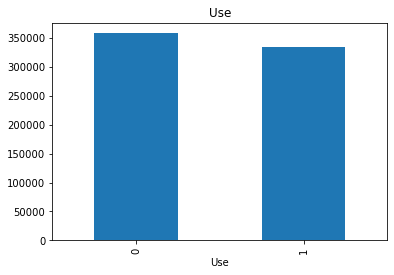

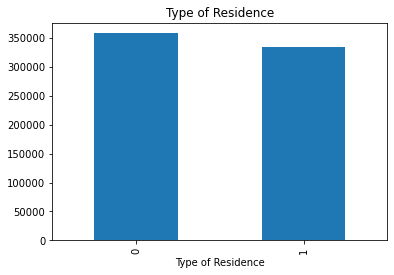

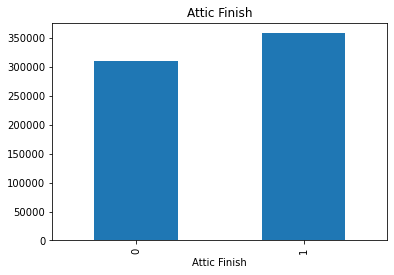

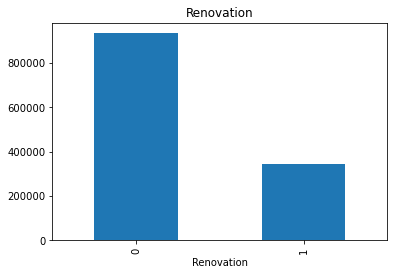

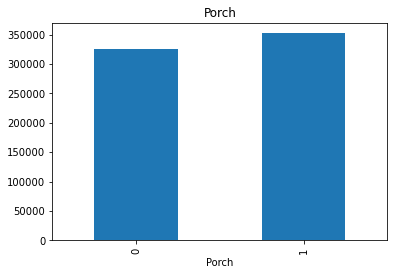

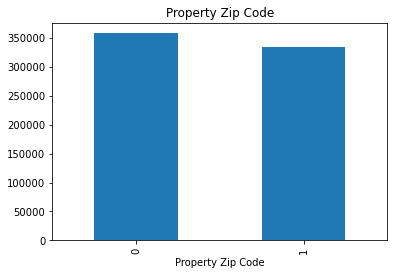

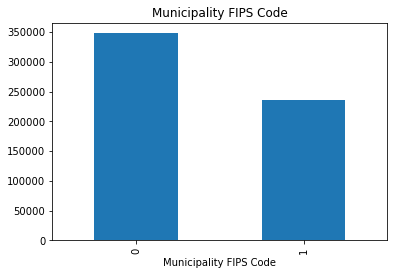

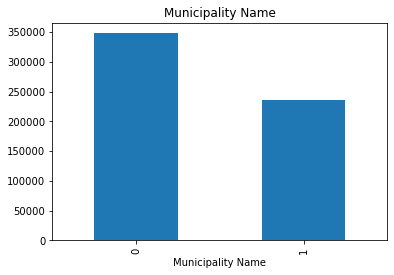

In [29]:
for feature in feautres_na:
    na_data = data.copy()
    na_data[feature] = np.where(na_data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    na_data.groupby(feature)['Sale Price'].mean().plot.bar()
    plt.title(feature)
    plt.show()

I observe that there is relationship between features with missing values and dependent variable (Sales Price).So I need to replace these missing values with meaningful data.
Next, I check which features are having numerical data.

In [30]:
numerical_features = [features for features in data.columns if data[features].dtypes != 'O']
numerical_features

['Property Class',
 'Township Code',
 'Neighborhood Code',
 'Township Neighborhood Only',
 'Proportion Assessed',
 'Multi Code Indicator',
 'Multi Code',
 'Number of Active 288s (HIEs)',
 'Number of Ended 288s (HIEs)',
 'Sale Price',
 'Sale Document Number',
 'Land Square Feet',
 'Age',
 'Rooms',
 'Bedrooms',
 'Fireplaces',
 'Full Baths',
 'Half Baths',
 'Building Square Feet',
 'Tract GEOID',
 'Municipality FIPS Code',
 "O'Hare Noise Indicator",
 'FEMA Floodplain',
 'Flood Risk Factor',
 'Flood Risk Direction',
 'Road Proximity < 100 Feet',
 'Road Proximity 101 - 300 Feet',
 'Longitude',
 'Latitude',
 'Tax Rate',
 'Tract Median Income']

In [31]:
data[numerical_features].head()

Property Class  Township Code  Neighborhood Code  \
8              299             71              71082   
33             299             73              73031   
42             299             72              72380   
43             299             77              77131   
52             299             73              73084   

    Township Neighborhood Only  Proportion Assessed  Multi Code Indicator  \
8                           82             0.052600                     0   
33                          31             0.087400                     0   
42                         380             0.055400                     0   
43                         131             0.005058                     0   
52                          84             0.033800                     0   

    Multi Code  Number of Active 288s (HIEs)  Number of Ended 288s (HIEs)  \
8          2.0                           NaN                          NaN   
33         2.0                           NaN                          NaN   
42         2.0                           NaN                          NaN   
43         2.0                           NaN                          NaN   
52         2.0                           NaN                          NaN   

    Sale Price  ...  O'Hare Noise Indicator  FEMA Floodplain  \
8     225000.0  ...                       0                0   
33    295000.0  ...                       0                0   
42    100500.0  ...                       0                0   
43    261000.0  ...                       0                0   
52    207000.0  ...                       0                0   

    Flood Risk Factor  Flood Risk Direction  Road Proximity < 100 Feet  \
8                   4                     1                          0   
33                  6                     1                          0   
42                  1                     0                          0   
43                  6                     0                          0   
52                  1                     0                          0   

    Road Proximity 101 - 300 Feet  Longitude   Latitude  Tax Rate  \
8                               0 -87.705654  41.946889     6.913   
33                              0 -87.665250  41.981877     6.890   
42                              0 -87.775142  41.774606     6.890   
43                              1 -87.641703  41.874852     6.890   
52                              0 -87.652401  41.951394     6.890   

    Tract Median Income  
8                 79671  
33                90288  
42                44085  
43               116377  
52                72778  

[5 rows x 31 columns]

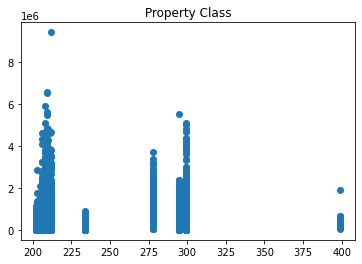

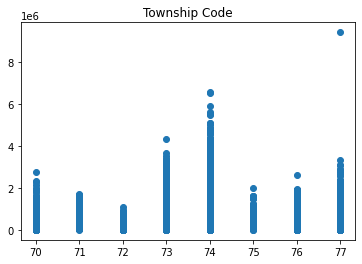

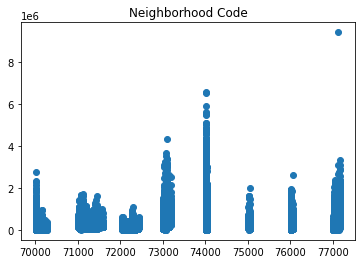

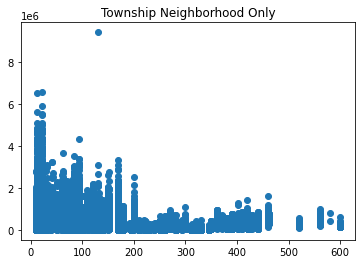

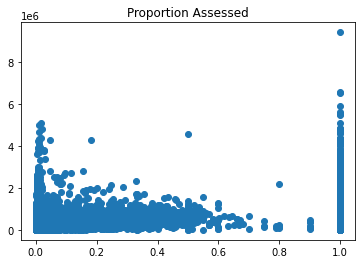

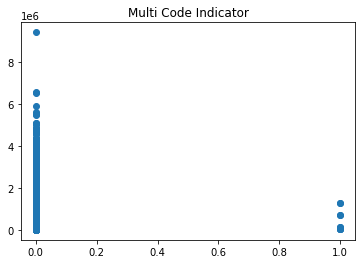

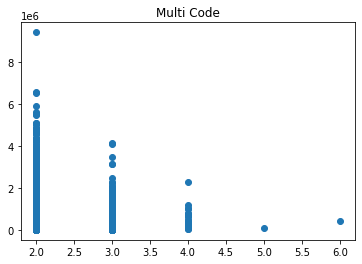

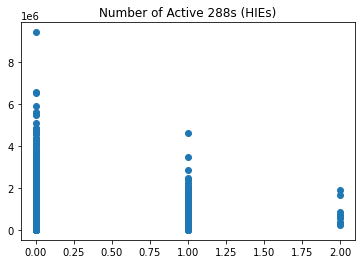

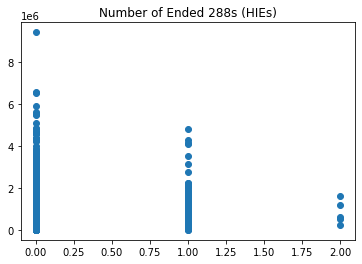

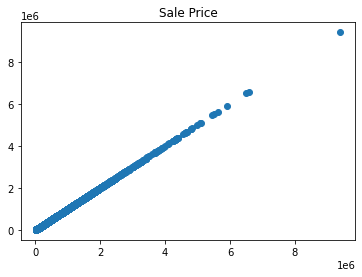

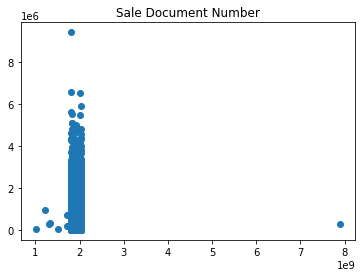

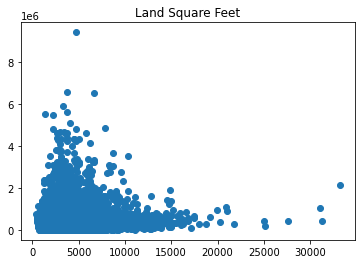

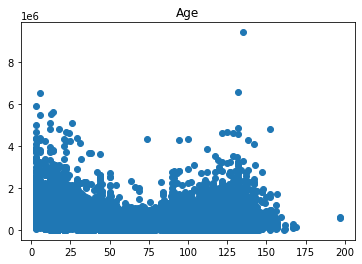

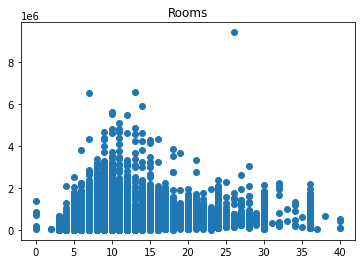

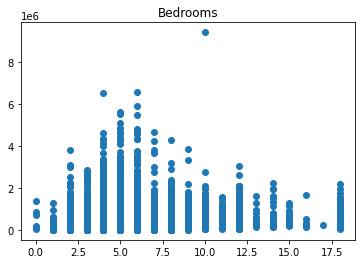

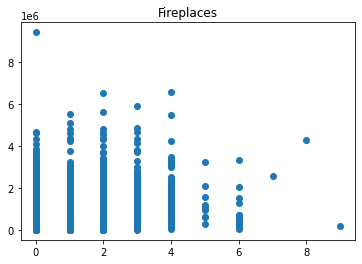

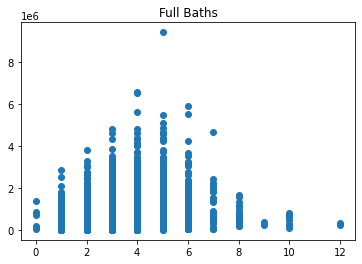

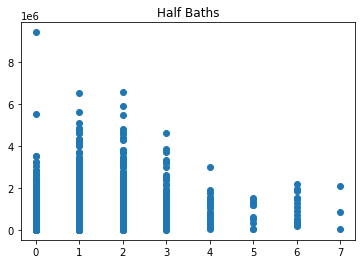

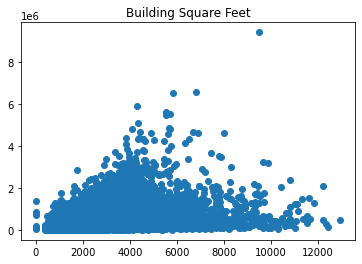

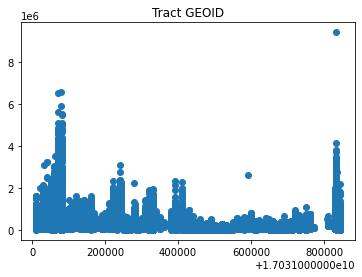

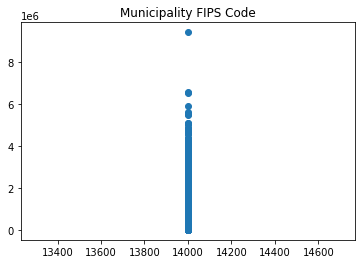

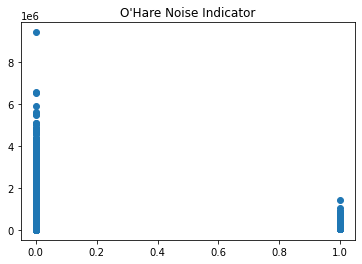

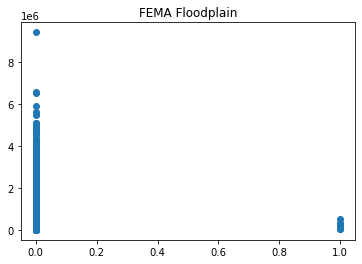

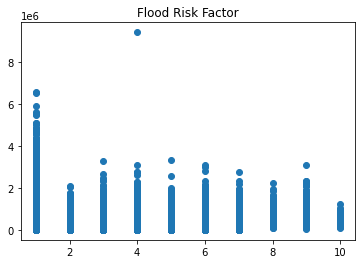

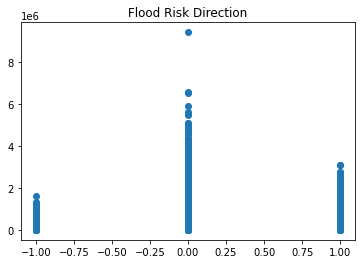

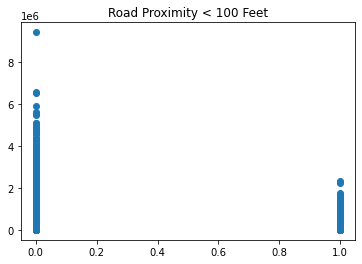

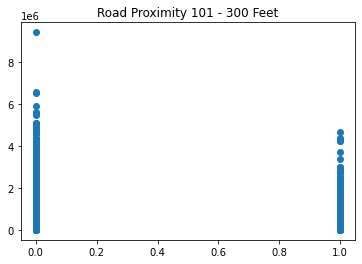

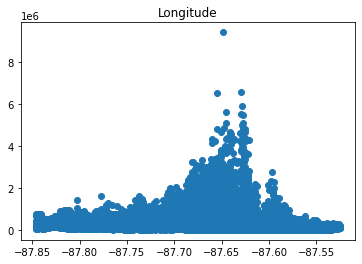

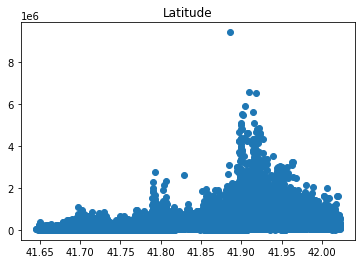

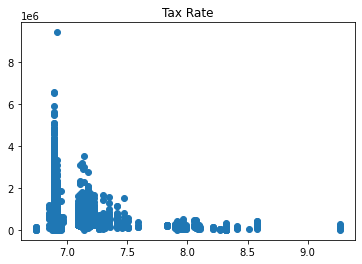

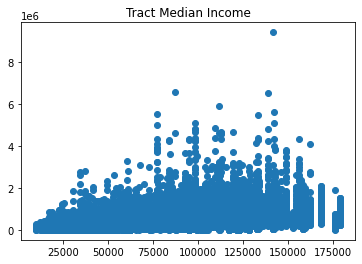

In [32]:
for feature in numerical_features:
    num_data = data.copy()
    plt.scatter(num_data[feature],data['Sale Price'])
    plt.title(feature)
    plt.show()

In [33]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<15 and feature]
print(len(discrete_features))
discrete_features

15


['Township Code',
 'Multi Code Indicator',
 'Multi Code',
 'Number of Active 288s (HIEs)',
 'Number of Ended 288s (HIEs)',
 'Fireplaces',
 'Full Baths',
 'Half Baths',
 'Municipality FIPS Code',
 "O'Hare Noise Indicator",
 'FEMA Floodplain',
 'Flood Risk Factor',
 'Flood Risk Direction',
 'Road Proximity < 100 Feet',
 'Road Proximity 101 - 300 Feet']

In [34]:
data[discrete_features].head()

Township Code  Multi Code Indicator  Multi Code  \
8              71                     0         2.0   
33             73                     0         2.0   
42             72                     0         2.0   
43             77                     0         2.0   
52             73                     0         2.0   

    Number of Active 288s (HIEs)  Number of Ended 288s (HIEs)  Fireplaces  \
8                            NaN                          NaN         NaN   
33                           NaN                          NaN         NaN   
42                           NaN                          NaN         NaN   
43                           NaN                          NaN         NaN   
52                           NaN                          NaN         NaN   

    Full Baths  Half Baths  Municipality FIPS Code  O'Hare Noise Indicator  \
8          NaN         NaN                 14000.0                       0   
33         NaN         NaN                 14000.0                       0   
42         NaN         NaN                 14000.0                       0   
43         NaN         NaN                 14000.0                       0   
52         NaN         NaN                 14000.0                       0   

    FEMA Floodplain  Flood Risk Factor  Flood Risk Direction  \
8                 0                  4                     1   
33                0                  6                     1   
42                0                  1                     0   
43                0                  6                     0   
52                0                  1                     0   

    Road Proximity < 100 Feet  Road Proximity 101 - 300 Feet  
8                           0                              0  
33                          0                              0  
42                          0                              0  
43                          0                              1  
52                          0                              0

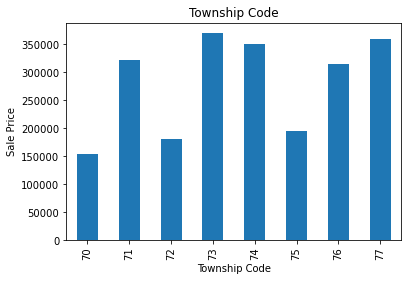

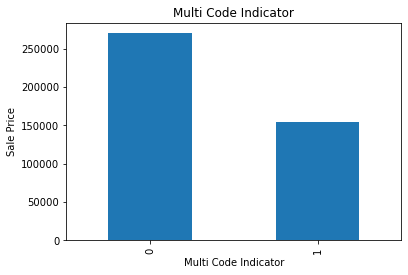

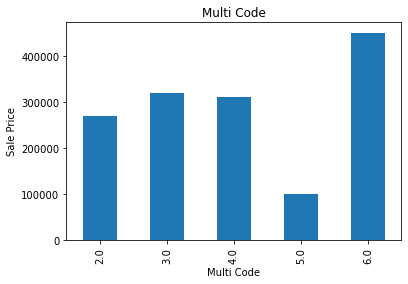

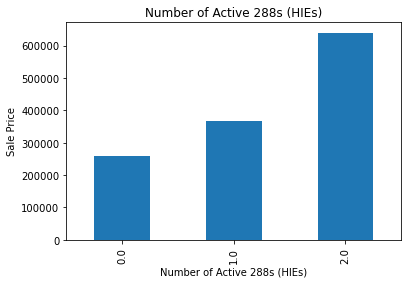

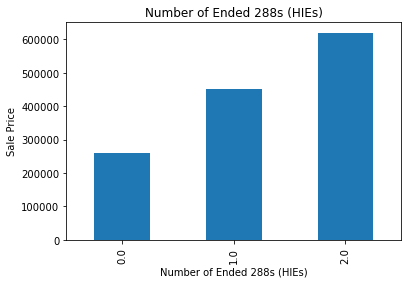

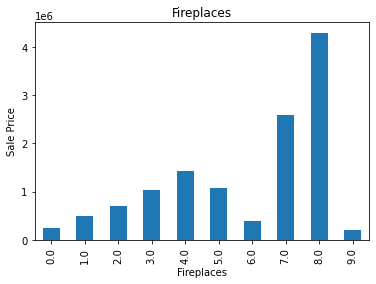

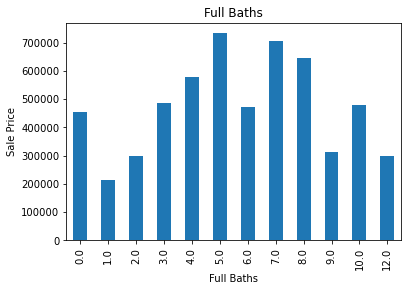

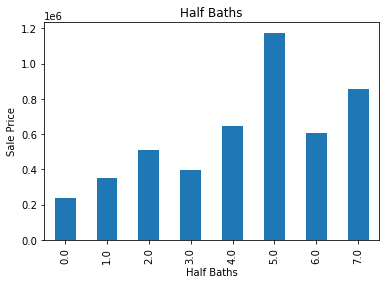

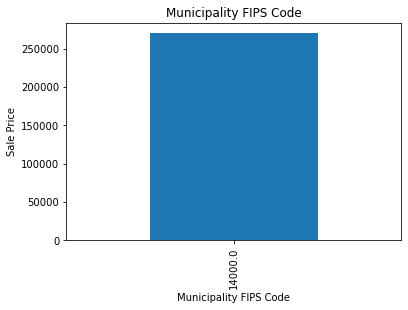

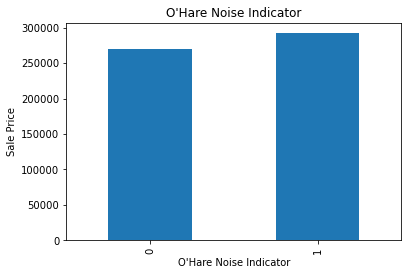

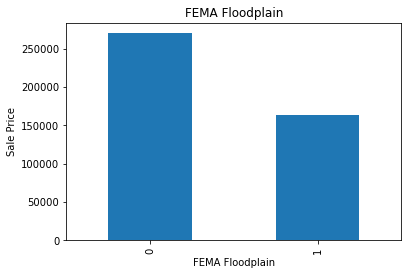

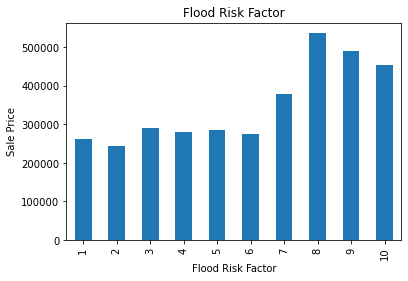

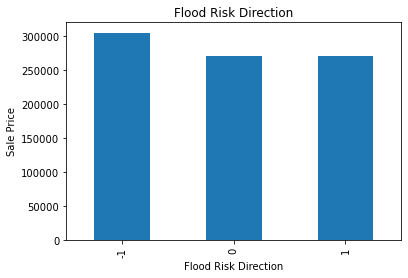

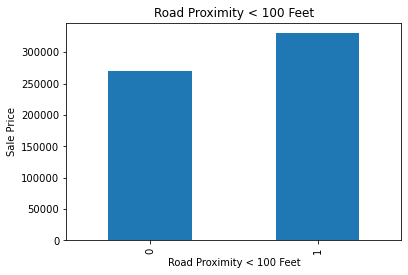

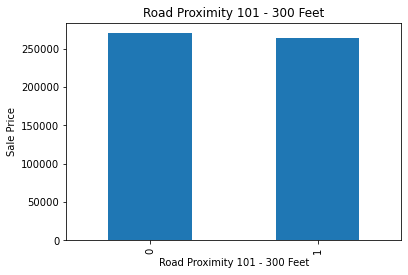

In [35]:
for feature in discrete_features:
    dis_data = df.copy()
    dis_data.groupby(feature)['Sale Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

In [36]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(len(continous_features))
continous_features

16


['Property Class',
 'Neighborhood Code',
 'Township Neighborhood Only',
 'Proportion Assessed',
 'Sale Price',
 'Sale Document Number',
 'Land Square Feet',
 'Age',
 'Rooms',
 'Bedrooms',
 'Building Square Feet',
 'Tract GEOID',
 'Longitude',
 'Latitude',
 'Tax Rate',
 'Tract Median Income']

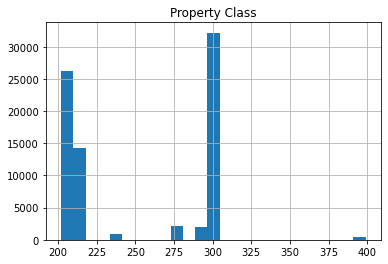

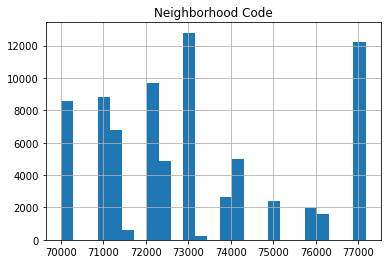

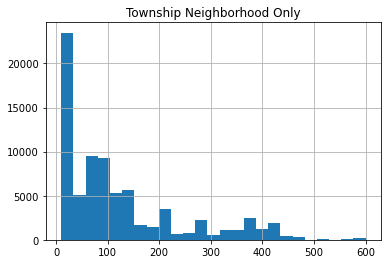

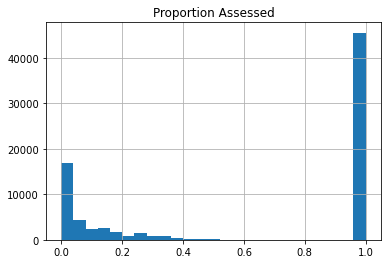

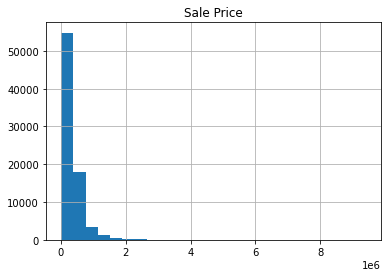

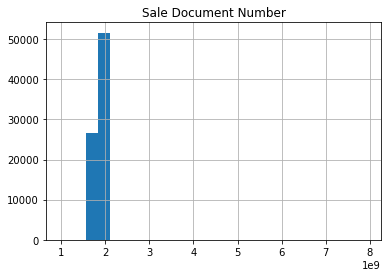

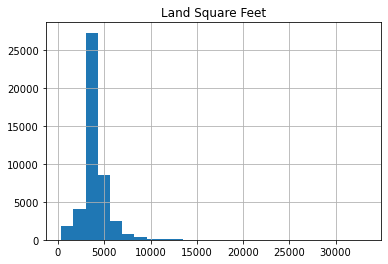

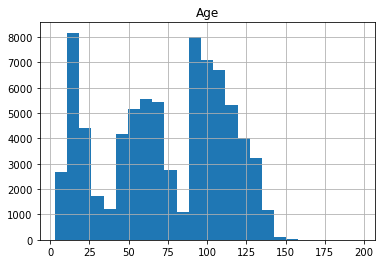

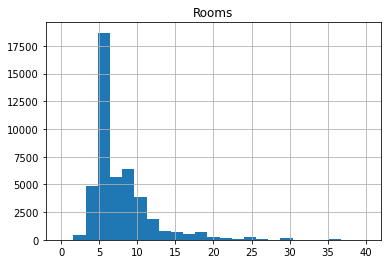

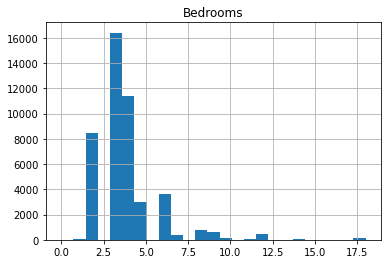

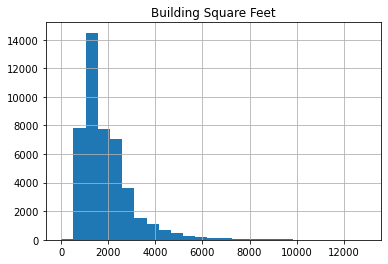

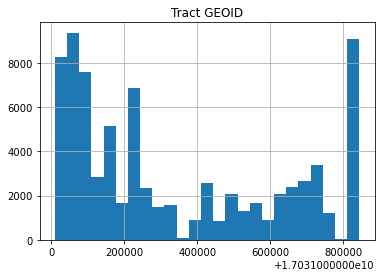

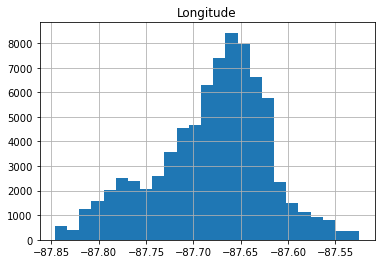

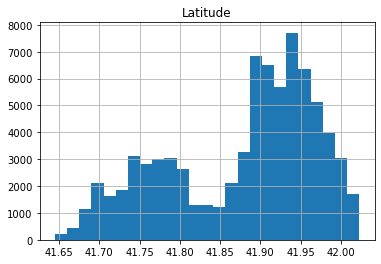

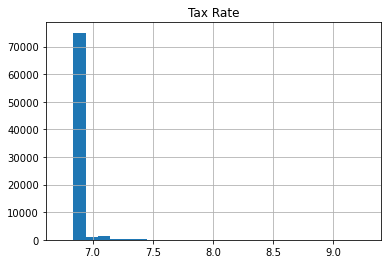

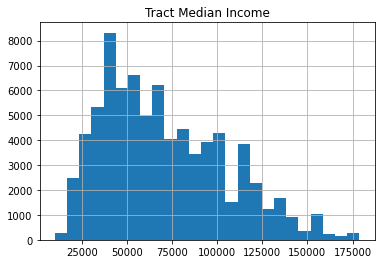

In [37]:
#Using histograms for continous numerical variable to study patterns
for feature in continous_features:
    cont_data = df.copy()
    cont_data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()

Observing that some of the distributions are skewed

I will normalise the skewed ones with lograthmic transformation

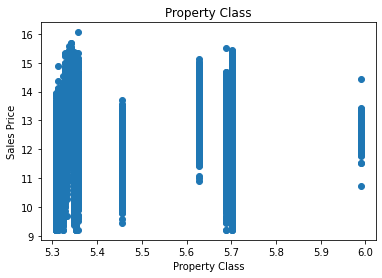

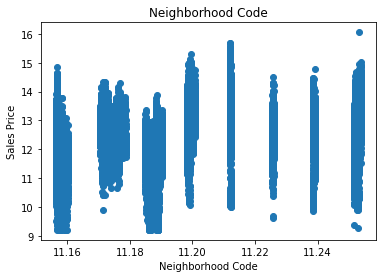

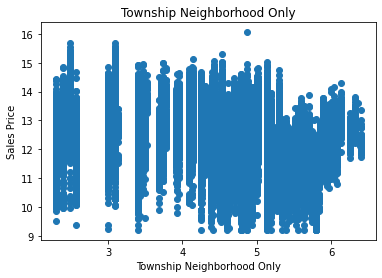

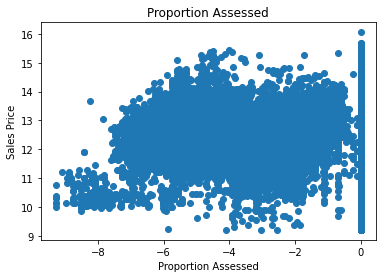

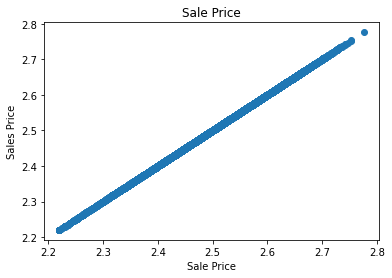

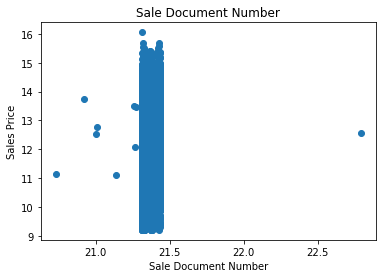

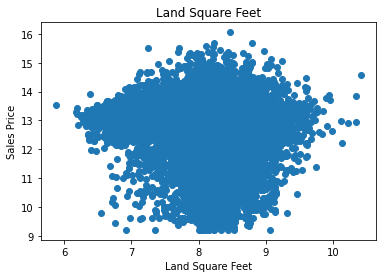

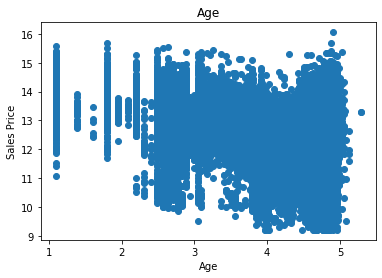

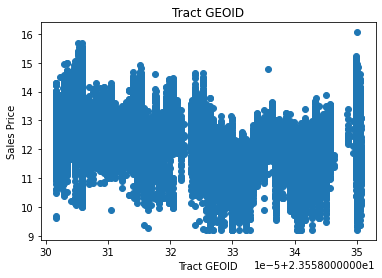

C:\Users\Yerlan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


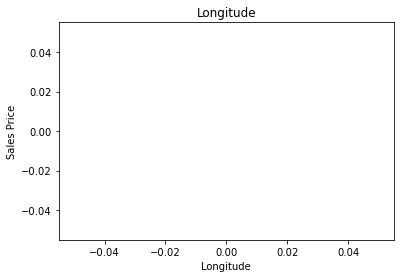

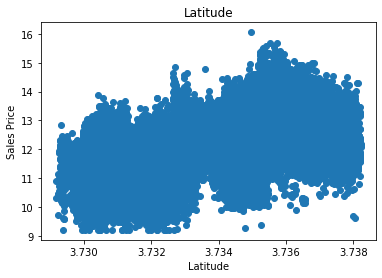

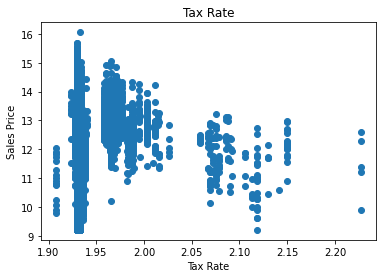

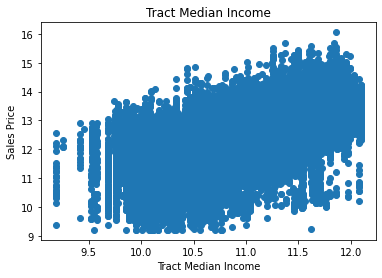

In [38]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['Sale Price'] = np.log(data['Sale Price'])
        plt.scatter(data[feature],data['Sale Price'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()
        

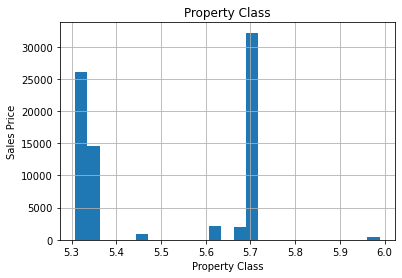

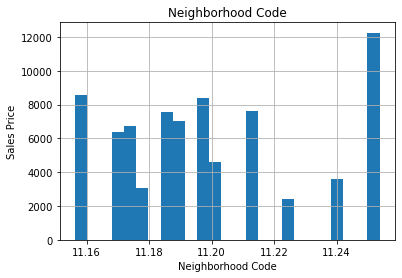

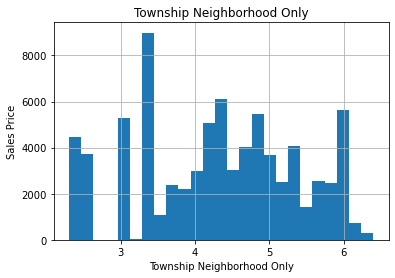

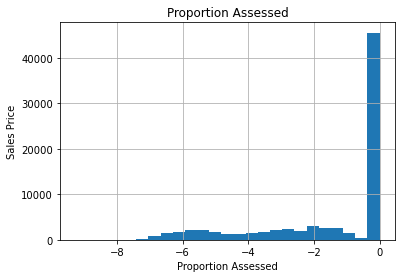

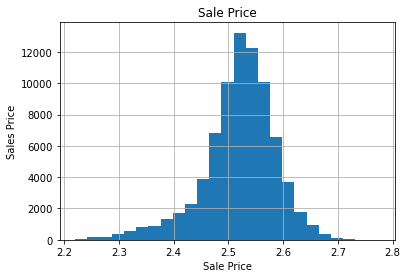

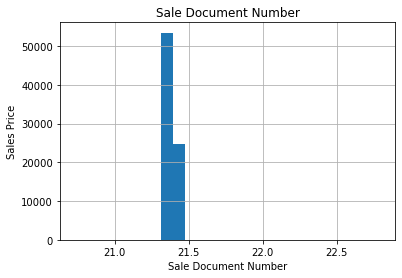

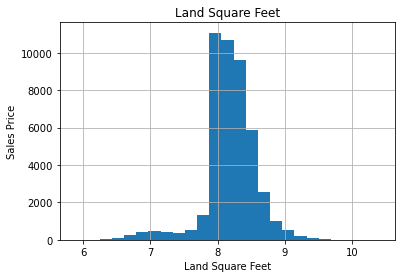

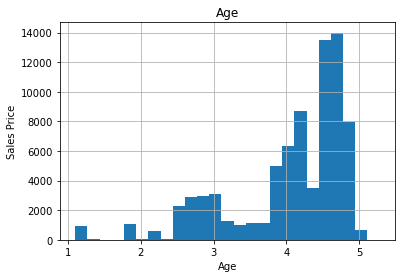

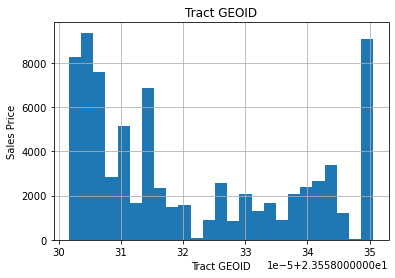

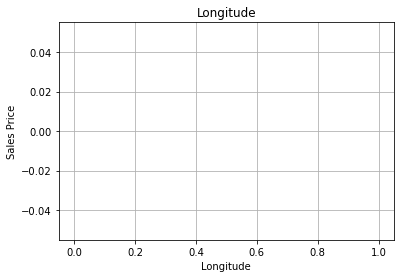

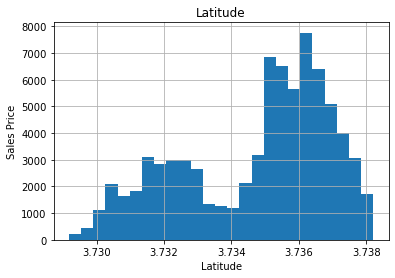

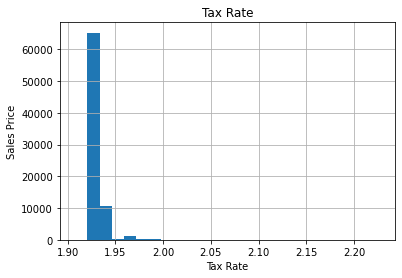

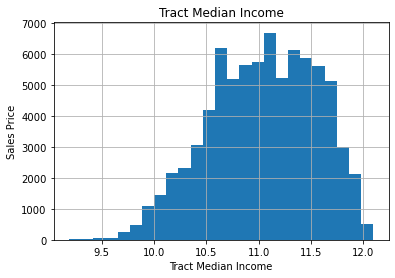

In [39]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['Sale Price'] = np.log(data['Sale Price'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()

In [40]:
#Observing categorical features 
categorical_features =[feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_features

['Property Index Number',
 'Assessment Triad',
 'Property Address',
 'Property Apartment Num.',
 'Property City',
 'Township Name',
 'Modeling Group',
 'Key PIN',
 'Sale Date',
 'Large Home Indicator',
 'Apartments',
 'Wall Material',
 'Roof Material',
 'Basement',
 'Basement Finish',
 'Central Heating',
 'Central Air Conditioning',
 'Attic Type',
 'Design Plan',
 'Cathedral Ceiling',
 'Garage 1 Size',
 'Garage 1 Material',
 'Garage 1 Attached',
 'Garage 1 Area',
 'Repair Condition',
 'Use',
 'Type of Residence',
 'Attic Finish',
 'Renovation',
 'Porch',
 'Property Zip Code',
 'Municipality Name',
 'Elementary/Middle School District',
 'High School District',
 'geoposition']

In [41]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(data[feature].unique())))

Distinct categories for Property Index Number  are 78151
Distinct categories for Assessment Triad  are 1
Distinct categories for Property Address  are 45084
Distinct categories for Property Apartment Num.  are 225
Distinct categories for Property City  are 2
Distinct categories for Township Name  are 8
Distinct categories for Modeling Group  are 3
Distinct categories for Key PIN  are 20612
Distinct categories for Sale Date  are 711
Distinct categories for Large Home Indicator  are 3
Distinct categories for Apartments  are 7
Distinct categories for Wall Material  are 5
Distinct categories for Roof Material  are 7
Distinct categories for Basement  are 5
Distinct categories for Basement Finish  are 4
Distinct categories for Central Heating  are 5
Distinct categories for Central Air Conditioning  are 3
Distinct categories for Attic Type  are 4
Distinct categories for Design Plan  are 3
Distinct categories for Cathedral Ceiling  are 3
Distinct categories for Garage 1 Size  are 9
Distinct ca

In [42]:
# Checking the null values
data.isnull().sum()

Property Index Number                    0
Assessment Triad                         0
Property Class                           0
Property Address                     32606
Property Apartment Num.              72172
Property City                        32606
Township Name                            0
Township Code                            0
Neighborhood Code                        0
Township Neighborhood Only               0
Modeling Group                           0
Proportion Assessed                      0
Key PIN                              45500
Multi Code Indicator                     0
Multi Code                              22
Number of Active 288s (HIEs)         32579
Number of Ended 288s (HIEs)          32579
Sale Date                                0
Sale Price                               0
Sale Document Number                     0
Land Square Feet                     32579
Large Home Indicator                 32579
Age                                      0
Apartments 

<AxesSubplot:>

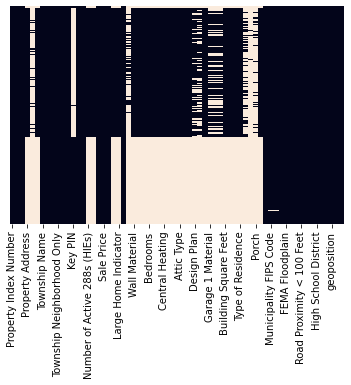

In [43]:
# heatmap for visualizing the null vaues
sns.heatmap(data.isnull(),yticklabels = False,cbar = False)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78156 entries, 8 to 678636
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property Index Number              78156 non-null  object 
 1   Assessment Triad                   78156 non-null  object 
 2   Property Class                     78156 non-null  int64  
 3   Property Address                   45550 non-null  object 
 4   Property Apartment Num.            5984 non-null   object 
 5   Property City                      45550 non-null  object 
 6   Township Name                      78156 non-null  object 
 7   Township Code                      78156 non-null  int64  
 8   Neighborhood Code                  78156 non-null  int64  
 9   Township Neighborhood Only         78156 non-null  int64  
 10  Modeling Group                     78156 non-null  object 
 11  Proportion Assessed                78156 non-null  fl

# Data cleaning

In [45]:
for feature in categorical_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])                    

In [46]:
for feature in discrete_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [47]:
for feature in continous_features:
    data[feature] = data[feature].fillna(data[feature].mean())

In [48]:
for feature in more_than_45_percent_misssing_value_features:
    data.drop([feature],axis = 1, inplace = True)    

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78156 entries, 8 to 678636
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property Index Number              78156 non-null  object 
 1   Assessment Triad                   78156 non-null  object 
 2   Property Class                     78156 non-null  int64  
 3   Property Address                   78156 non-null  object 
 4   Property City                      78156 non-null  object 
 5   Township Name                      78156 non-null  object 
 6   Township Code                      78156 non-null  int64  
 7   Neighborhood Code                  78156 non-null  int64  
 8   Township Neighborhood Only         78156 non-null  int64  
 9   Modeling Group                     78156 non-null  object 
 10  Proportion Assessed                78156 non-null  float64
 11  Multi Code Indicator               78156 non-null  in

In [52]:
data.drop(['Sale Date','Property Zip Code','geoposition'],axis = 1, inplace = True)

In [53]:
data.rename(columns = {'Road Proximity < 100 Feet':'Road Proximity under 100 Feet'}, inplace = True)

In [54]:
#Storing data
with open('data1.pkl', 'wb') as file:
    dill.dump(data, file)

In [55]:
with open('data1.pkl', 'rb') as file:
    data1 = dill.load(file)

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78156 entries, 8 to 678636
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Assessment Triad                   78156 non-null  object 
 1   Property Class                     78156 non-null  int64  
 2   Property City                      78156 non-null  object 
 3   Township Name                      78156 non-null  object 
 4   Township Code                      78156 non-null  int64  
 5   Neighborhood Code                  78156 non-null  int64  
 6   Township Neighborhood Only         78156 non-null  int64  
 7   Modeling Group                     78156 non-null  object 
 8   Proportion Assessed                78156 non-null  float64
 9   Multi Code Indicator               78156 non-null  int64  
 10  Multi Code                         78156 non-null  float64
 11  Number of Active 288s (HIEs)       78156 non-null  fl

<AxesSubplot:>

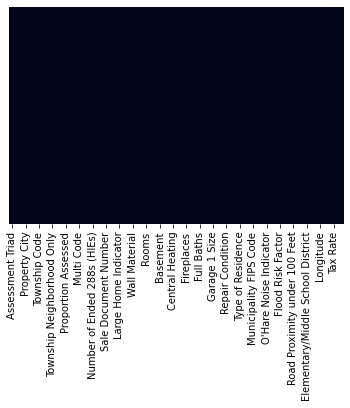

In [57]:
# heatmap for visualizing the null vaues
sns.heatmap(data1.isnull(),yticklabels = False,cbar = False)

In [100]:
data1.shape

(78156, 32)

Data Transformation by One Hot Encoding of categorical variables

In [59]:
columns =[feature for feature in data.columns if data1[feature].dtypes == 'O']
len(columns)

18

In [60]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [61]:
final_df=data1

In [62]:
final_df.shape

(78156, 50)

In [63]:
final_df=category_onehot_multcols(columns)

Assessment Triad
Property City
Township Name
Modeling Group
Wall Material
Roof Material
Basement
Basement Finish
Central Heating
Central Air Conditioning
Attic Type
Garage 1 Size
Repair Condition
Use
Type of Residence
Municipality Name
Elementary/Middle School District
High School District


In [64]:
final_df.shape

(78156, 478)

In [65]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [85]:
final_df.shape

(78156, 476)

In [71]:
#Storing data
with open('final_df.pkl', 'wb') as file:
    dill.dump(final_df, file)

In [72]:
with open('final_df.pkl', 'rb') as file:
    final_df = dill.load(file)

In [73]:
X = final_df.drop('Sale Price', axis=1)
y = final_df['Sale Price']

# Base model implementation - Regression

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
X_train.shape

(62524, 475)

In [87]:
X_train.head()

Property Class  Township Code  Neighborhood Code  \
376855             202             72              72423   
585953             299             77              77051   
581116             299             71              71082   
219771             211             76              76030   
264609             203             72              72380   

        Township Neighborhood Only  Proportion Assessed  Multi Code Indicator  \
376855                         423               1.0000                     0   
585953                          51               0.3446                     0   
581116                          82               0.0529                     0   
219771                          30               1.0000                     0   
264609                         380               1.0000                     0   

        Multi Code  Number of Active 288s (HIEs)  Number of Ended 288s (HIEs)  \
376855         2.0                           0.0                          0.0   
585953         2.0                           0.0                          0.0   
581116         2.0                           0.0                          0.0   
219771         2.0                           0.0                          1.0   
264609         2.0                           0.0                          0.0   

        Sale Document Number  ...  ROOSEVELT HS  SCHURZ HS  SENN HS  \
376855          2.025307e+09  ...             0          0        0   
585953          1.823619e+09  ...             0          0        0   
581116          1.818608e+09  ...             1          0        0   
219771          1.832057e+09  ...             0          0        0   
264609          1.822712e+09  ...             0          0        0   

        SOLORIO HS  STEINMETZ COLLEGE PREP HS  SULLIVAN HS  TAFT HS  \
376855           0                          0            0        0   
585953           0                          0            0        0   
581116           0                          0            0        0   
219771           0                          0            0        0   
264609           0                          0            0        0   

        TILDEN HS  WASHINGTON HS  WELLS HS  
376855          0              0         0  
585953          0              0         1  
581116          0              0         0  
219771          1              0         0  
264609          0              0         0  

[5 rows x 475 columns]

In [88]:
print(X_train.columns)

Index(['Property Class', 'Township Code', 'Neighborhood Code',
       'Township Neighborhood Only', 'Proportion Assessed',
       'Multi Code Indicator', 'Multi Code', 'Number of Active 288s (HIEs)',
       'Number of Ended 288s (HIEs)', 'Sale Document Number',
       ...
       'ROOSEVELT HS', 'SCHURZ HS', 'SENN HS', 'SOLORIO HS',
       'STEINMETZ COLLEGE PREP HS', 'SULLIVAN HS', 'TAFT HS', 'TILDEN HS',
       'WASHINGTON HS', 'WELLS HS'],
      dtype='object', length=475)


In [158]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(X_train, y_train)            

LinearRegression()

In [162]:
y_pred = lr.predict(X_test)

In [164]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  0.456611


In [165]:
from sklearn import metrics
print("R^2:", metrics.r2_score(y_test, y_pred))

R^2: 0.6846838846201059


# XGBoost model implemenation

In [96]:
conda install -c conda-forge py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Yerlan\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    libxgboost-1.5.1           |   cpu_h110a20b_2         2.3 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py39ha538f94_2         151 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         conda-forge/win-64::libxgboost-1.5.1-cpu_



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




libxgboost-1.5.1     | 2.3 MB    | ########## | 100% 

python_abi-3.9       | 4 KB      |            |   0% 
python_abi-3.9       | 4 KB      | ########## | 100% 
python_abi-3.9       | 4 KB      | ########## | 100% 

conda-4.13.0         | 1.0 MB    |            |   0% 
conda-4.13.0         | 1.0 MB    | ########## | 100% 
conda-4.13.0         | 1.0 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [89]:
# implementing XGBoost regressor
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [90]:
import pickle
filename = "finalazied_model.plk"
pickle.dump(classifier,open(filename,'wb'))

In [95]:
# predicting the house prices
y_predict = classifier.predict(X_test)

In [166]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_predict))
print("RMSE : % f" %(rmse))
print("R^2:", metrics.r2_score(y_test, y_predict))

RMSE :  0.386051
R^2: 0.7746062590189612


# Hyperparameter tuning

In [120]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [121]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=10,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [122]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
    

In [123]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# XGBoost implementation with tuned hyperparameters

In [152]:
# substituting the best parameters
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [155]:
y_predict_tuned = regressor.predict(X_test)

In [167]:
# RMSE Computation for tuned model
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_predict_tuned))
print("RMSE : % f" %(rmse))
print("R^2:", metrics.r2_score(y_test, y_predict_tuned))

RMSE :  0.364886
R^2: 0.7986426607959669
